# Algoritmo de clasificación para predecir diabetes.

In [333]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [334]:
datos = pd.read_csv('diabetes.csv')
datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Limpieza de datos

como el numero de embarazos que ha tenido y el grosor de la piel no son factores que afecten mucho en la deteccion de la diabetes podemos quitar estas columnas

In [335]:
datos = datos.drop(columns=['Pregnancies', 'SkinThickness'])
datos

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,101,76,180,32.9,0.171,63,0
764,122,70,0,36.8,0.340,27,0
765,121,72,112,26.2,0.245,30,0
766,126,60,0,30.1,0.349,47,1


todos los valores que estan en 0 los cambiamos por la media sobre los valores que si tienen un valor mayor que 0, esto lo hacemos para todas las columnas menos para la columna DiabetesPedigreeFunction y Age

In [336]:
mediaGlucose = datos[datos['Glucose'] != 0]['Glucose'].mean()
integerMediaGlucose = int(mediaGlucose)
datos.loc[(datos['Glucose'] == 0), 'Glucose'] = integerMediaGlucose

In [337]:
mediaBloodPressure = datos[datos['BloodPressure'] != 0]['BloodPressure'].mean()
integerBloodPressure = int(mediaBloodPressure)
datos.loc[(datos['BloodPressure'] == 0), 'BloodPressure'] = integerBloodPressure

In [338]:
mediaInsulin = datos[datos['Insulin'] != 0]['Insulin'].mean()
integerInsulin = int(mediaInsulin)
datos.loc[(datos['Insulin'] == 0), 'Insulin'] = integerInsulin

In [339]:
mediaBMI = datos[datos['BMI'] != 0]['BMI'].mean()
mediaBMI = round(mediaBMI, 1)
datos.loc[(datos['BMI'] == 0), 'BMI'] = mediaBMI

verificamos si existen valores atipicos (outliers).
con la calculadora para outliers (https://www.graphpad.com/quickcalcs/Grubbs1.cfm)

se puede ver que en la columna BloodPressure existen los sigueintes datos atipicos: 122, 24

In [340]:
datos = datos[datos['BloodPressure'] != 122]
datos = datos[datos['BloodPressure'] != 24]
datos.shape[0]

766

en la columna Insulin existe los sigientes datos atipicos con valor de 846, 744, 680, 600, 579, 545, 543, 540, 510, 495, 495, 485, 480, 480, 478, 474, 465, 440, 415, 402, 392, 387, 375, 370, 360 eliminamos estos datos.

In [341]:
datos = datos[datos['Insulin'] < 360]
datos.shape[0]

741

para el indice de masa corporal BMI existen los siguientes datos atipicos: 67.1, 59.4

In [342]:
datos = datos[datos['BMI'] < 59.4]
datos.shape[0]

739

para nuestra columna de DiabetesPedigreeFunction existen los siguientes datos atipicos: 2.420, 2.329, 2.288, 2.137, 1.893, 1.781, 1.731, 1.699, 1.698, 1.600. Eliminamos estos datos de nuestro dataset

In [343]:
datos = datos[datos['DiabetesPedigreeFunction'] < 1.6]
datos.shape[0]

732

Para nuestra columna de edad (Age) tenemos los siguientes datos atipicos: 81

In [344]:
datos = datos[datos['Age'] != 81]
datos.shape[0]

731

### Atributos y variable de clasificacion

In [345]:
X = np.array(datos.drop(["Outcome"], axis=1))
y = np.array(datos["Outcome"])

### Datos de entrenamiento y de prueba

In [346]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=0, test_size=0.20)

## Creando el modelo

In [347]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=12, max_depth=15, min_samples_split=20)

In [348]:
tree.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=12,
                       min_samples_split=20)

In [349]:
tree.tree_.max_depth

8

In [350]:
predicciones_prueba = tree.predict(X_prueba)
predicciones_entrenamiento = tree.predict(X_entrenamiento)

### Mostrando el arbol de forma visual

In [351]:
# Se require instalar la libreria grpahviz
# si esta utilizando colab use la siguiente instrucción
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [352]:
# si esta utilizando colab use la siguiente instrucción
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [353]:
import graphviz 
from sklearn.tree import export_graphviz

In [354]:
feature_names = datos.drop(["Outcome"], axis=1).columns

In [355]:
dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

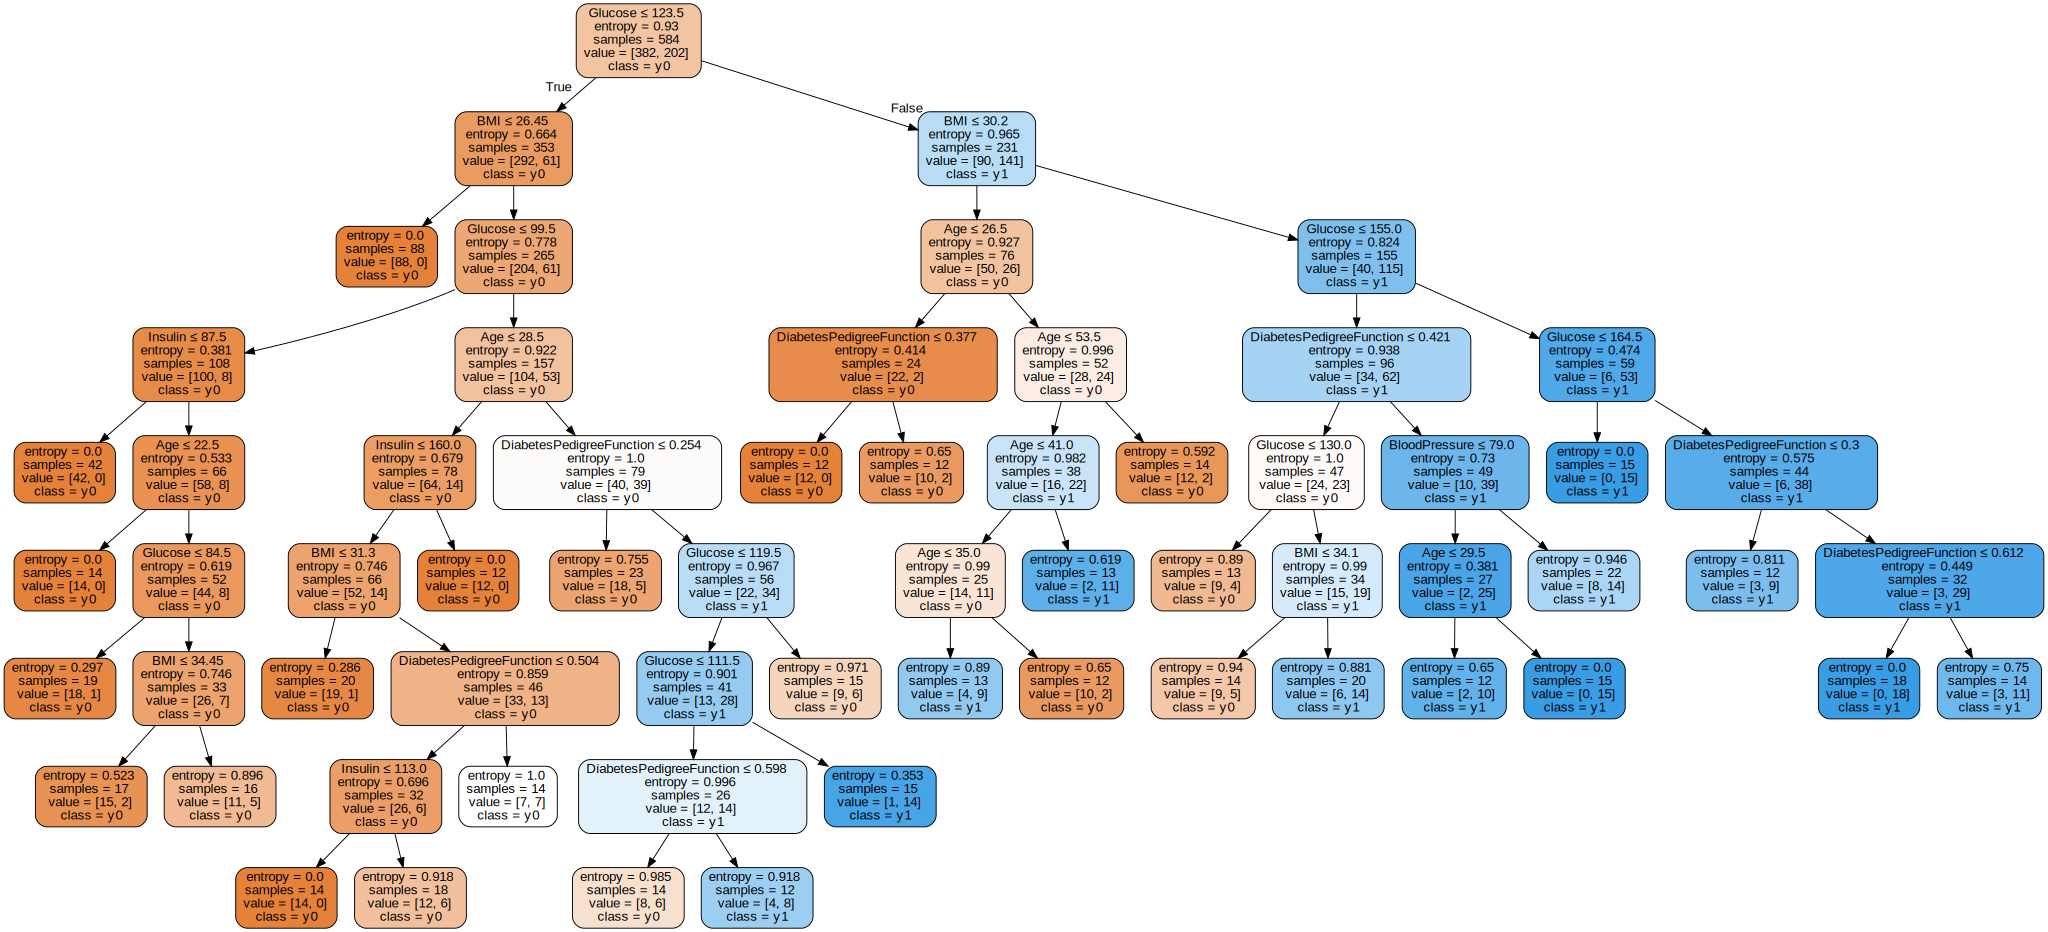

In [356]:
graph

## Métricas

In [357]:
# importar librerias para métricas
from sklearn.metrics import accuracy_score

### Exactitud

In [358]:
print("Exactitud (conjunto de entrenamiento): ", accuracy_score(y_entrenamiento, predicciones_entrenamiento))
print("Exactitud (conjunto de prueba): ", accuracy_score(y_prueba, predicciones_prueba))

Exactitud (conjunto de entrenamiento):  0.851027397260274
Exactitud (conjunto de prueba):  0.7619047619047619


### Creando un nuevo paciente

vemos que este modelo no está sobre ajustado (el sobre ajuste es que las metricas de entrenamiento sean muy buenas o altas y que las metricas para los datos de prueba salgan bajas o malas), por lo que nos sirve para hacer nuevas predicciones

In [359]:
nuevoPaciente = np.array([196, 76, 280, 37, 0.605, 57]).reshape(1, -1)
prediccionNuevoPaciente = tree.predict(nuevoPaciente)
prediccionNuevoPaciente

array([1])